# Wordclouds

Wordclouds are a quick, engaging way to visualise text data. In Python, the simplest and most effective way to generate wordclouds is through the use of the [Wordcloud](http://amueller.github.io/word_cloud/) library. In 
this tutorial, I'll explain how to generate wordclouds using the Wordcloud library.

This tutorial was written using using Jupyter notebooks, Python 3.7.5 and Wordcloud 1.6.0; things might behave slightly differently if you're in a different IDE or using different versions of the language/library.

## Disclaimer

Every statistician I have ever met requires me to inform you that wordclouds are not useful for analysis because they are simplistic and often misleading; I recommend [this excellent article](https://www.niemanlab.org/2011/10/word-clouds-considered-harmful/) which goes into more detail on the problems with the form.

The criticisms of wordclouds are absolutely valid, but that's not to say that they are purposeless. While I wouldn't recommend them as a method of analysis or information extraction, they're a useful tool for presentation - people seem to find them fun and engaging, and they're a good thing to have on initial pages of presentations, etc. As long as you focus on using them for aesthetic, rather than analytic, reasons, they have a place. 

## Data source

In order to demonstrate the possibilities of wordclouds, some text data is required. For the purposes of this notebook, I've chosen to use the text of *Addie's Husband* or *Through Clouds to Sunshine*, a novel by [Mrs. Gordon Smythies](https://www.jstor.org/stable/2911375?seq=1), one of the most popular and most forgotten of Victorian novelists. 

You can find a copy of *Addie's Husband* on [Amazon](https://www.amazon.co.uk/Addies-Husband-Mrs-Gordon-Smythies-ebook/dp/B014LRV9YS) or on [Project Gutenberg](https://www.gutenberg.org/files/49806/49806-h/49806-h.htm). It's the affecting story of Adelaide, a young woman with bad lungs but a good heart. I accessed the text from Project Gutenberg, using the excellent [Gutenberg Python library](https://pypi.org/project/Gutenberg/).

In order that this notebook can focus almost entirely on wordclouds, rather than text cleaning, I've already processed the novel's full text into a more consistent form. To be specific, the following steps have been carried out:

1. Removal of all metadata, including chapter headings, leaving just the prose
2. Conversion of all text to lowercase
3. Removal of all punctuation, special characters, and numeric values
4. Removal of [stopwords](https://en.wikipedia.org/wiki/Stop_words) and all words with fewer than 3 letters
5. [Lemmatisation](https://en.wikipedia.org/wiki/Lemmatisation) (converting each word to its dictionary form)
6. Removal of all proper nouns I found on a cursory search

The end result of this process is a text file - `adelaide.txt` - containing a standardised and simplified form of *Addie's Husband*.

## Required libraries

In order to work with the Wordcloud library effectively, you require several imports. Obviously the Wordcloud library itself, but also it helps to have libraries to deal with text processing and images.

In [1]:
from collections import Counter  # Count the frequency of distinct strings
from wordcloud import WordCloud, ImageColorGenerator  # Generate wordclouds
from PIL import Image  # Load images from files
import numpy as np  # Convert images to numbers

## Loading and preparing the data

As already mentioned, the data for this notebook is stored in a `.txt` file. The first step is simply to load the file's data.

In [2]:
# Load the data from a file
with open("./resources/adelaide.txt", "r") as file:
    text = file.read()

In [3]:
# View the first 200 characters of the text

text[:200]

'soldier sailor tinker tailor policeman plowboy gentleman lift lovely head dear marry gentleman miss absorbed enjoyment ruddy ribstone pippin turn blooming freckle face speaker answer pleasantly though'

Our current text is perfectly suitable for wordcloud generation - given raw text, the Wordcloud library will automatically process it and generate a wordcloud.

However, text can also be provided in the form of a frequency dictionary, in which the `key:value` pairs have the form `word:frequency`. I find this conceptually neater, as it allows you more explicit control over the processing steps before generating the cloud. 

In [4]:
# Split the text into a list of individual words

tokens = text.split(" ")

# Count the frequency of each word

word_counts = Counter(tokens)

In [5]:
# Display the count for a single word.

word_counts["love"]

133

## Basic wordclouds

In order to generate and display the most basic of wordclouds, very little is required. You need a `WordCloud` object, and then to call `.generate()` on it, passing a string as an argument.

Finally, to display the cloud, `.to_image()`.

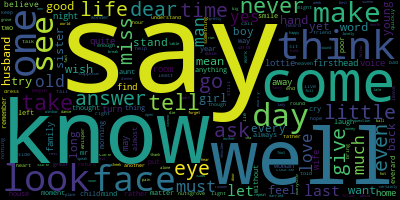

In [6]:
fog_machine = WordCloud()  # Create a wordcloud generator 

fog_machine.generate(text)  # Generate the cloud using raw text

fog_machine.to_image()

Our basic wordcloud is rather small, and will require some customisation to improve.

In the cell below, I've generated a slightly better one, by using the following parameters:

- `width` and `height` to increase the size of the cloud's canvas area, and thus image quality
- `min_font_size` to ensure that no words are too small to read
- `background_color` to demonstrate that it doesn't have to be black if you don't want it to
- `colormap` to choose a specific colour palette. Any valid [Matplotlib colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) name is acceptable.

I've also chosen to generate the cloud using the frequency dictionary this time, not the raw text; that doesn't really have an effect on the style, it's just to demonstrate how you would do it.

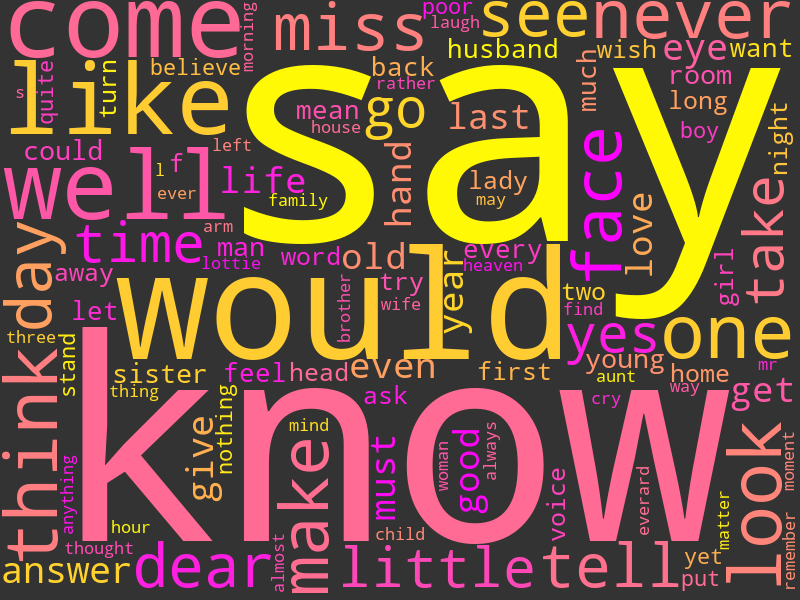

In [7]:
# Customising the wordcloud itself

fog_machine = WordCloud(width=800,
                        height=600,
                        min_font_size=14,
                        background_color="#333333",
                        colormap="spring")  # Create a wordcloud generator with some better defaults

fog_machine.generate_from_frequencies(word_counts)  # Generate the cloud using a frequency dictionary

fog_machine.to_image()

At this point, I should stress that I'm not saying the customisation I've done is the best way of doing it - I have almost zero aesthetic sense. However, I'm confident that some things (such as increasing the size) are a definite improvement, and the other changes (such as choosing a colour palette) are there to show you the possibilities, not show off my artistry. It's not my intention to suggest that I'm any good at visual design, merely to show how it can be tailored by someone with a better understanding of colour theory (and other things) than me.

## Shaped wordclouds

Once you can create wordclouds with whatever colours you like, the next step is to shape the wordcloud, changing it from a boring rectangle into something appropriate to the content.

This is done by using an image as a [mask](https://www.colorexpertsbd.com/blog/what-is-image-masking); you provide the `WordCloud` object a numerical representation of an image with a **white** background, and the wordcloud will only draw words in positions where the image is not white.

As *Addie's Husband* is a romance, it seems appropriate that the mask we use should be a heart. The image I'm using was sourced from [Template Trove](https://templatetrove.com/).

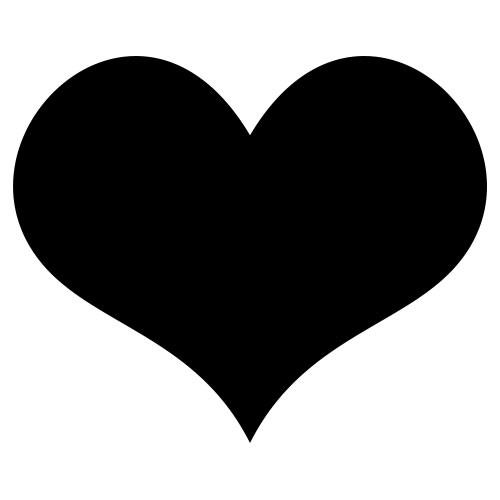

In [8]:
image = Image.open("./resources/heart.jpg")  # Load the image from a file

image  # Display the image

Once the image is loaded in, we need to convert it into a numeric form, in which each pixel is represented as an array of three integers; the `WordCloud` object will then only draw words on top of pixels in the image which are not equal to `[255, 255, 255]`.

In [9]:
mask = np.array(image)  # Convert the image to a numeric representation (a 3D array)

mask[0][0]  # Display the top left pixel of the mask, which is white

array([255, 255, 255], dtype=uint8)

After creating the mask, you create the wordcloud almost exactly as before, just passing in the `mask` parameter.

One key point to note is that masked wordclouds ignore the `width` and `height` parameters, instead sizing themselves based on the dimensions of the mask, so there is no need to include them.

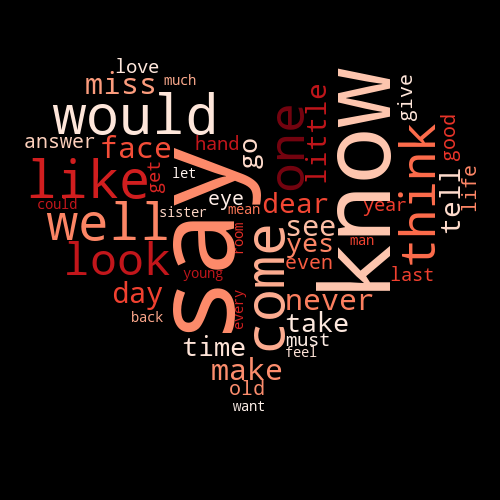

In [10]:
fog_machine = WordCloud(mask=mask,
                        min_font_size=14,
                        colormap="Reds")  # Create a wordcloud generator with a mask

fog_machine.generate_from_frequencies(word_counts)  # Generate the cloud using a frequency dictionary

fog_machine.to_image()  # Display the cloud

Shaping wordclouds like this works best with simple images, as otherwise the core shape is not clear. By default, it also only works with images that have a fully white background - transparent backgrounds, for example, are treated as non-masked, and the wordcloud occupies the full rectangle again.

It is possible to convert any image so that it has the correct structure for wordclouds, but doing so is rather beyond the scope of this notebook; we're focused on wordclouds today, not image processing.

## Shaped & Coloured wordclouds

We can use both shape and colour a wordcloud based on an image, so that the words not only form the rough shape, but that each word is coloured as the image is in the same place. For this task, we'll use another heart, this one rainbow-coloured, and sourced from [PNGfuel](https://pngfuel.com).

It's important to note here that this is a relatively crude fitting - a word that spans across several colour changes on the image will still only be in one colour, and you're not going to get lines as crisp and clear as the image itself. Again, this works best with simple images, ideally with clearly contrasting colours.

The first step is to load in an image, as before.

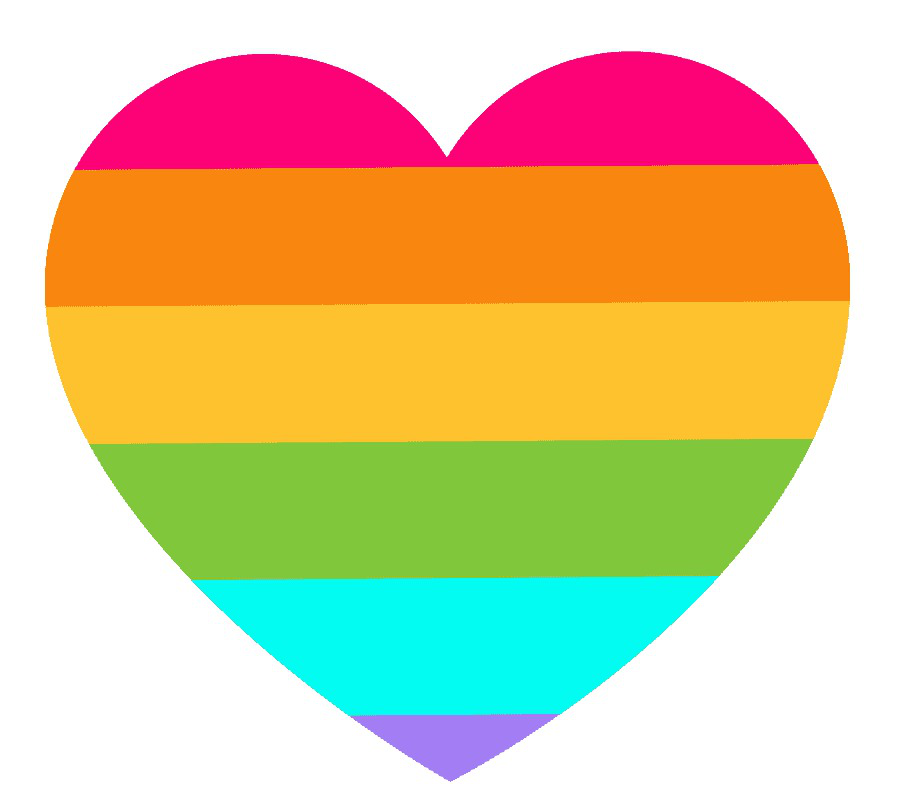

In [11]:
image = Image.open("./resources/rainbow_heart.jpeg")  # Load the image from a file

mask = np.array(image)  # Convert the image to a numeric representation

image  # Display the image

Once you've created the mask, you can then use it as an input to the `ImageColorGenerator` class, which is also part of the WordCloud library. This generates colours based on an image, and then can be used to colour words to match.

In [12]:
image_colours = ImageColorGenerator(mask)

You can then pass the `ImageColorGenerator` to a `WordCloud` object using the `color_func` parameter.

In order to ensure that our wordcloud roughly matches the colours of the image, I've set the `max_words` argument to 2000. This means that the `WordCloud` object will use more words than the default of 200, which will result in smaller words and - hopefully - clearer bands of colour.

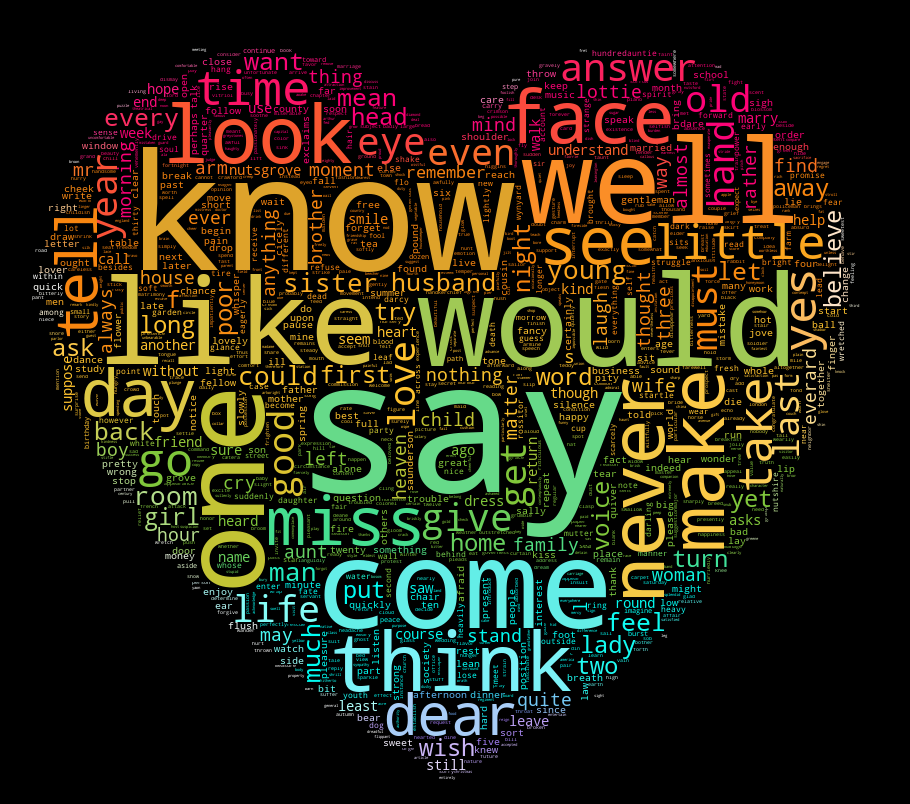

In [13]:
fog_machine = WordCloud(mask=mask,
                        max_words=2000,
                        color_func=image_colours)  # Create a wordcloud generator with a mask

fog_machine.generate_from_frequencies(word_counts)  # Generate the cloud using a frequency dictionary

fog_machine.to_image()

## Custom colour functions

It is sometimes useful to have full control over the colours of words, so that you can highlight particular words or groups of word; you might, for example, wish to show positive words in one colour and negative words in another.

We can define a custom colour function to do this, passing it to the `color_func` parameter just as for mask colours. In the cell below, I've defined a very simple one - return gold for words with the letter "o" in, grey for every other word - but you can customise this function to do whatever you want.

When the `WordCloud` object calls the function, it passes it a lot of information; this means that - when defining your custom function - it's better to have the parameters as `*args, *kwargs`, as then you can pick and choose which arguments to later care about. The word itself is always passed as the first argument, or `args[0]`.

In [14]:
# The custom function

def custom_colours(*args, **kwargs):
    word = args[0]  # First argument is the word itself
    if "o" in word: 
        return "#FFD700"
    return "#CCCCCC"

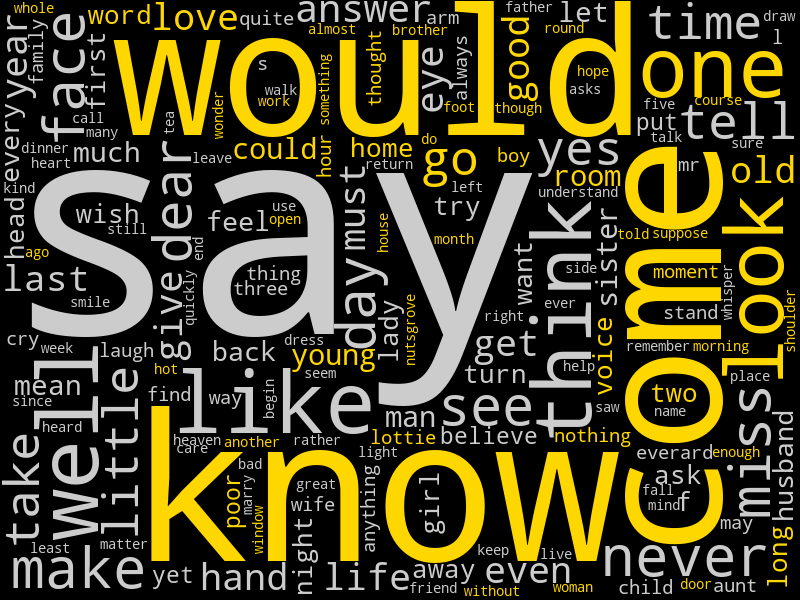

In [15]:
fog_machine = WordCloud(width=800,
                        height=600,
                        min_font_size=14,
                        color_func=custom_colours)  # Create a wordcloud generator with a custom color_func

fog_machine.generate_from_frequencies(word_counts)  # Generate the cloud using a frequency dictionary

fog_machine.to_image()  # Display the cloud

## Saving wordclouds

You can save a wordcloud to a file with a single line of code.

In [16]:
fog_machine.to_file("wordcloud.png")

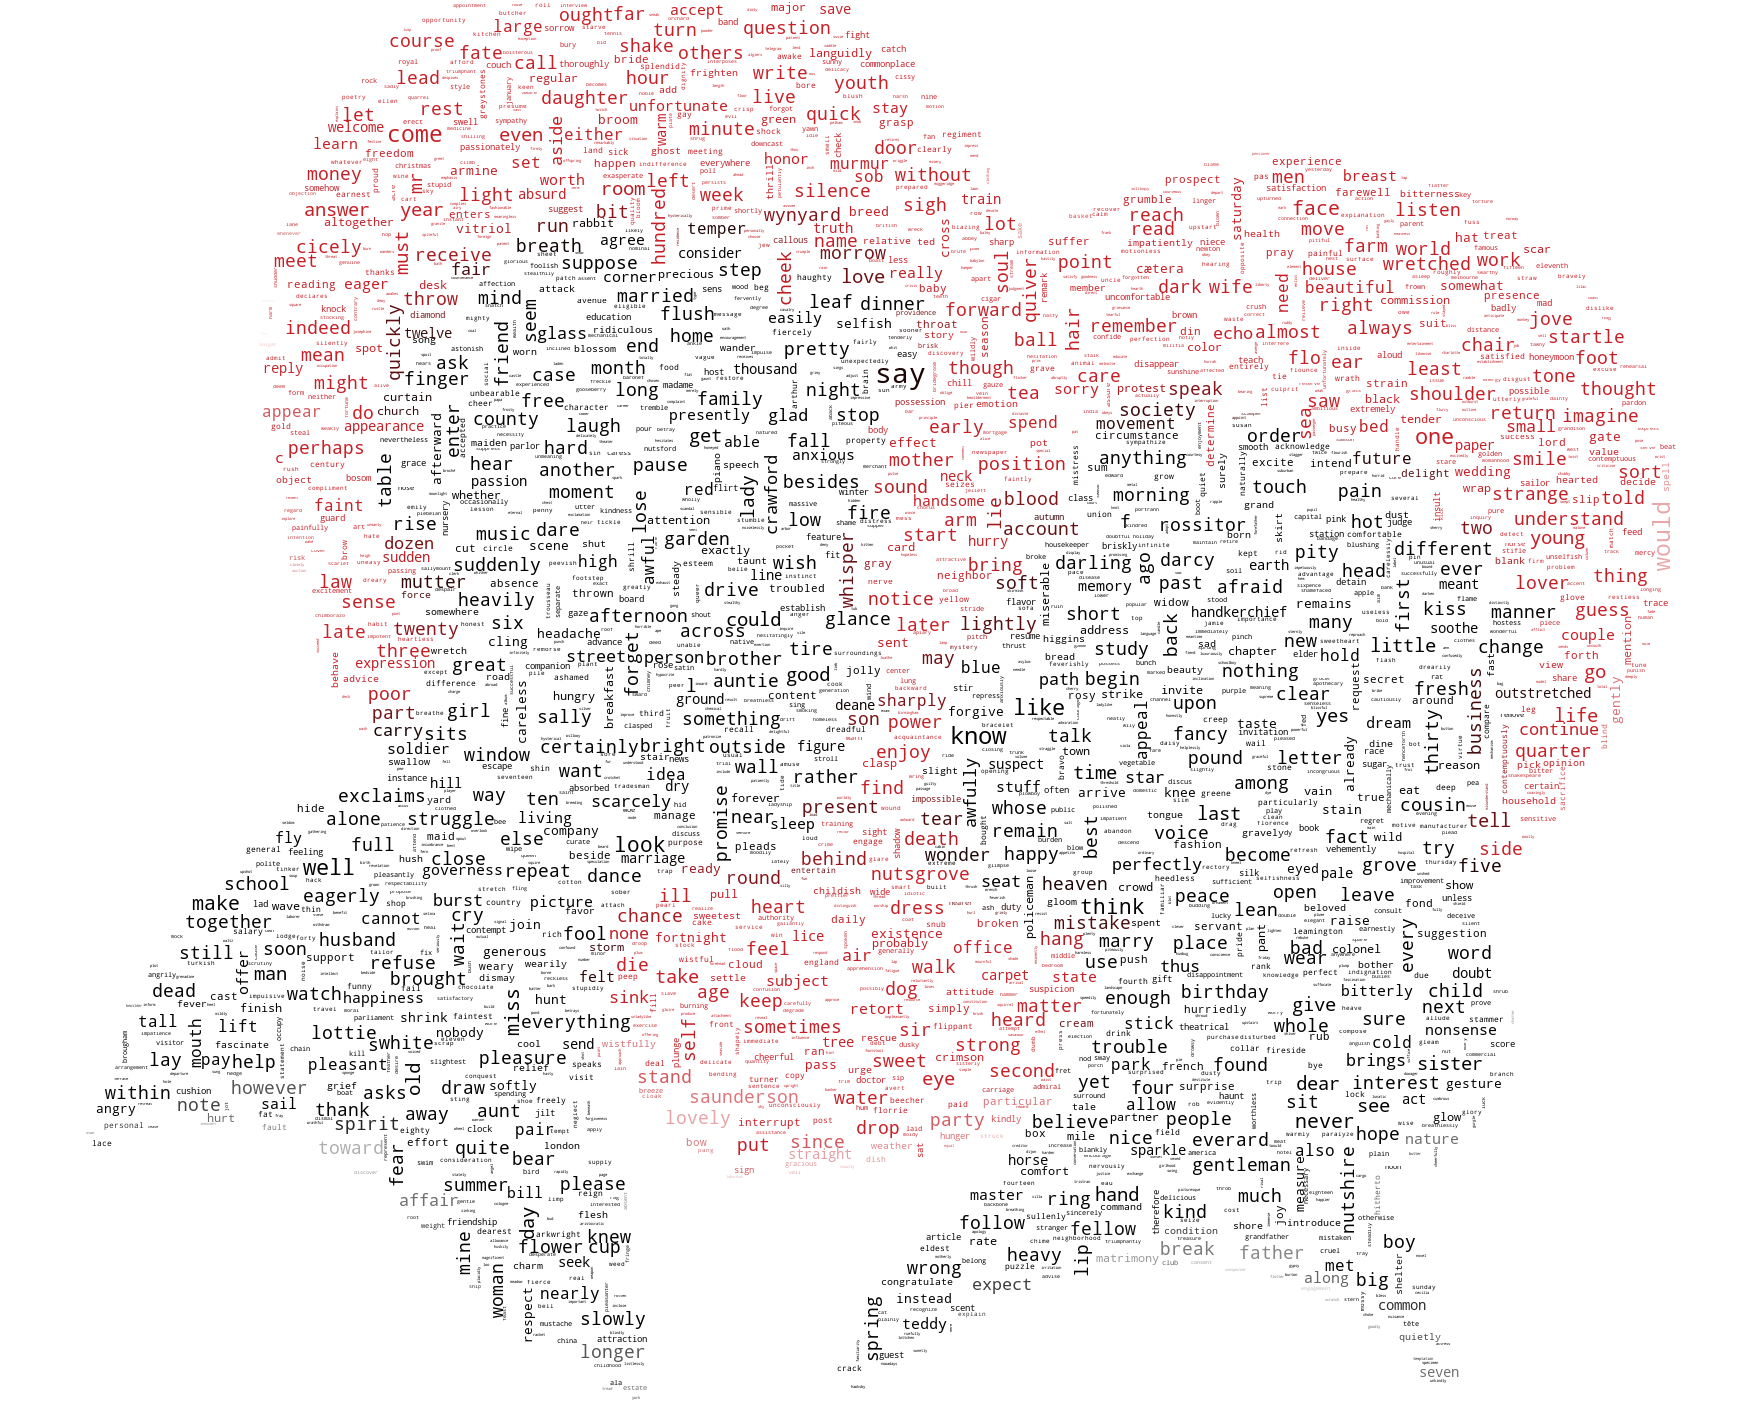

In [17]:
# One more wordcloud for Addie - the book does have a happy ending. The image is sourced from freepik.com.

image = Image.open("./resources/romance.jpeg")  # Load the image from a file

mask = np.array(image)  # Convert the image to a numeric representation

image_colors = ImageColorGenerator(mask)

fog_machine = WordCloud(mask=mask,
                        background_color="white",
                        max_font_size=28,
                        max_words=6000,
                        color_func=image_colors)  # Create a wordcloud generator with a mask

fog_machine.generate_from_frequencies(word_counts)  # Generate the cloud using a frequency dictionary

fog_machine.to_image()

## Conclusions

The final wordcloud we've created is a lot more complex than the previous ones; with a max of 6000 words (almost as many as there are unique words in *Addie's Husband*), it takes a lot longer to generate, and the text is noticeably smaller. However, the end result is (in my opinion) worth the effort. Though the words themselves are now somewhat hard to read (always an issue with big wordclouds), it's an image that expresses one of the main ideas in *Addie's Husband*, using words from *Addie's Husband*, and I think that's neat.

The Wordcloud library is stuffed with extra tweakable parameters, and there's a lot more you can do to refine things than is covered in this notebook. However, hopefully this gives some idea of the possibilities and the code to move towards them. The [module documentation](http://amueller.github.io/word_cloud/auto_examples/index.html) has many more examples.

There are a couple of caveats with wordclouds that should always be borne in mind. As already mentioned, it's easy to make confusing or misleading word clouds, because the focus on frequency ignores any information from the text that was contained in more than one word; "not happy" and "happy" are both going to make the word "happy" appear larger.  

Even if your wordclouds manage not to be misleading, that still doesn't make them meaningful; again, the focus on frequency ignores context and significance. Even with stopwords removed, it's clear from the wordclouds generated in this notebook that not all words are equally informative about what's actually happening in *Addie's Husband*. The word "say" is frequent, but would be equally so in almost any long narrative text. Arguably, the elaborate style of Victorian prose means that you'll get more frequent-but-not-significant words than a comparable modern text, but unless you do heavy cleaning, wordclouds will always contain some functional words. 

With the above said though, I still think wordclouds are a useful thing to be able to generate; as long as you bear the caveats in mind, and don't use them too heavily as actual analysis tools, they're an accessible and appealing visualisation that people respond to well.